### 1) Problem Statement
- this project understands how the student's performance is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch, Test Preparatin Course

### EDA

In [2]:
import pandas as p
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=p.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### 3. Data Checks to Perform
- Checks missing value
- Check Duplicates
- Check Datatype
- Check the no.of unique values of each column
- Check the statistics of dataset
- Check various categories present in the different categorical column

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(1000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data

In [12]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [13]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())
print("\n")
print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df["race_ethnicity"].unique())
print("\n")
print("Categories in 'test_preparation_course' variable: ",end=" ")
print(df['test_preparation_course'].unique())
print("\n")
print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())
print("\n")
print("Categories in 'parental_level_of_education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

Categories in 'gender' variable:  ['female' 'male']


Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']


Categories in 'test_preparation_course' variable:  ['none' 'completed']


Categories in 'lunch' variable:  ['standard' 'free/reduced']


Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [14]:
### Defining an caterogical or numerical features
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']

# Print columns
print("we have {} numerical features:{}".format(len(numeric_features),numeric_features))
print("\nwe have {} categorical features:{}".format(len(cat_features),cat_features))

we have 3 numerical features:['math_score', 'reading_score', 'writing_score']

we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Feature Engineering
## Adding Columns for "Total_Score" and "Average"

In [15]:
df['total_score']=df['math_score']+df['writing_score']+df['reading_score']
df['Average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [17]:
reading_full=df[df['reading_score']==100]['Average'].count()
writing_full=df[df['writing_score']==100]['Average'].count()
math_full=df[df['math_score']==100]['Average'].count()

print("no.of students with full marks in reading:{}".format(reading_full))
print("no.of students with full marks in writing:{}".format(writing_full))
print("no.of students with full marks in maths:{}".format(math_full))

no.of students with full marks in reading:17
no.of students with full marks in writing:14
no.of students with full marks in maths:7


In [18]:
reading_less_20=df[df['reading_score']<=20]['Average'].count()
writing_less_20=df[df['writing_score']<=20]['Average'].count()
math_less_20=df[df['math_score']<=20]['Average'].count()

print("no.of students with leass than marks in reading:{}".format(reading_less_20))
print("no.of students with less than marks in writing:{}".format(writing_less_20))
print("no.of students with leass than marks in maths:{}".format(math_less_20))

no.of students with leass than marks in reading:1
no.of students with less than marks in writing:3
no.of students with leass than marks in maths:4


### Insights
- from the above values we get students are poor in maths
- good in reading

### Exploring Data(Visualisation)
1. Visualise avg score distribution to make some conclusion
- Histogram
- KDE



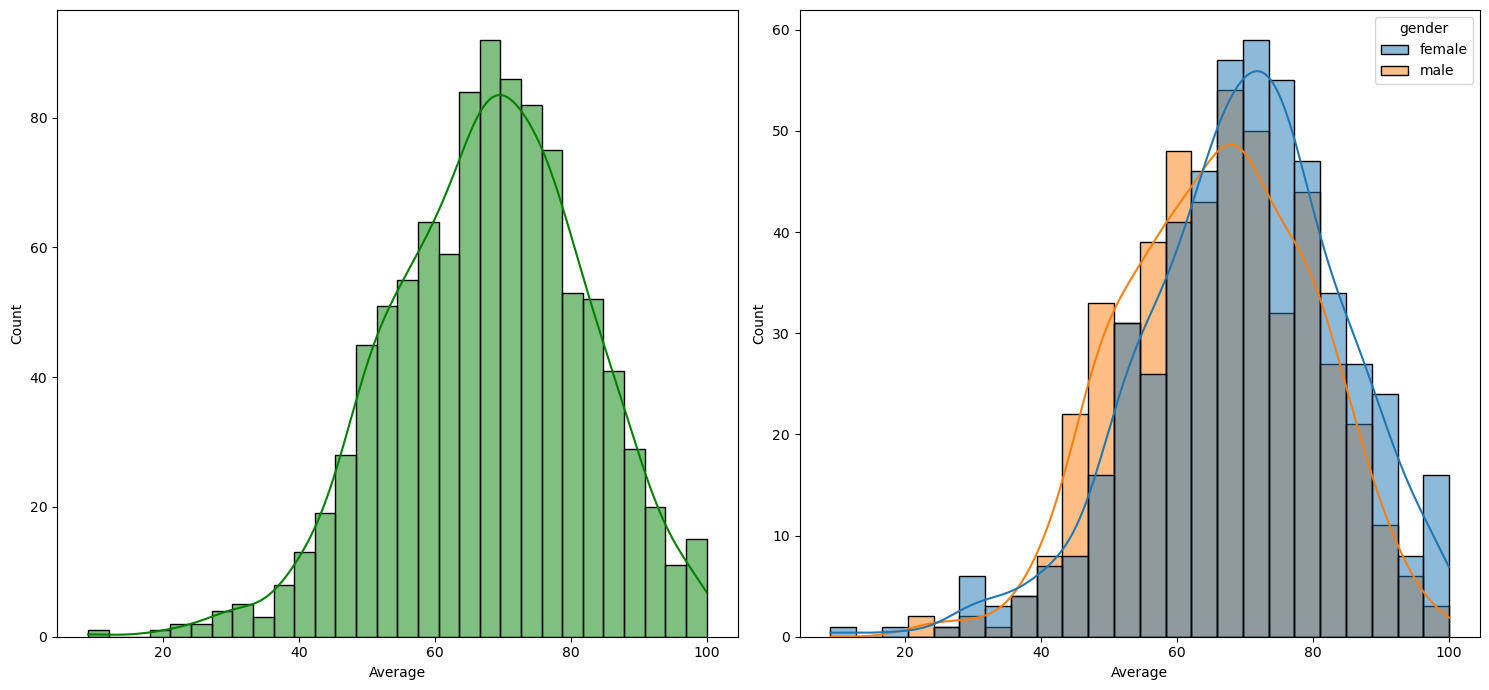

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='Average', bins=30, kde=True, color='g', ax=axs[0])


sns.histplot(data=df, x='Average', kde=True,hue='gender', ax=axs[1])


plt.tight_layout()
plt.show()

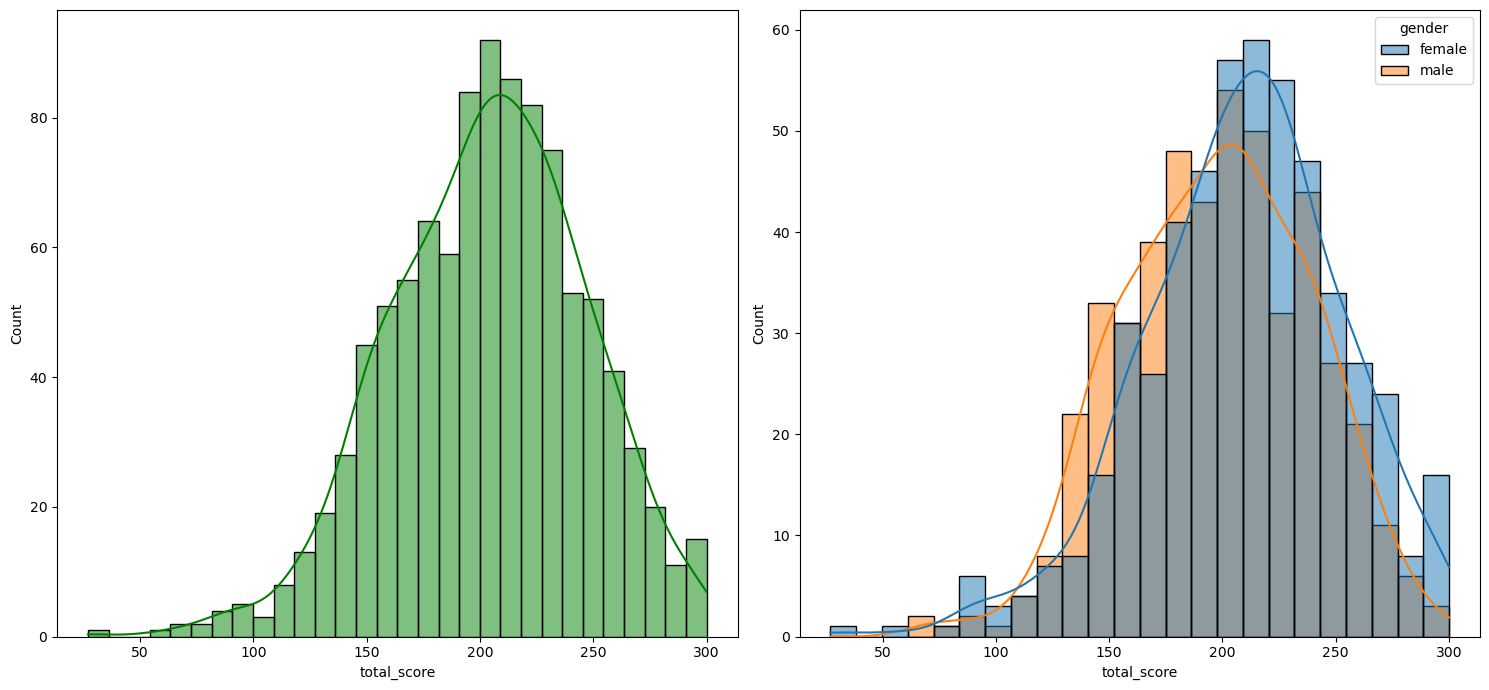

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])


sns.histplot(data=df, x='total_score', kde=True,hue='gender', ax=axs[1])


plt.tight_layout()
plt.show()

Female students tends to perform better than males

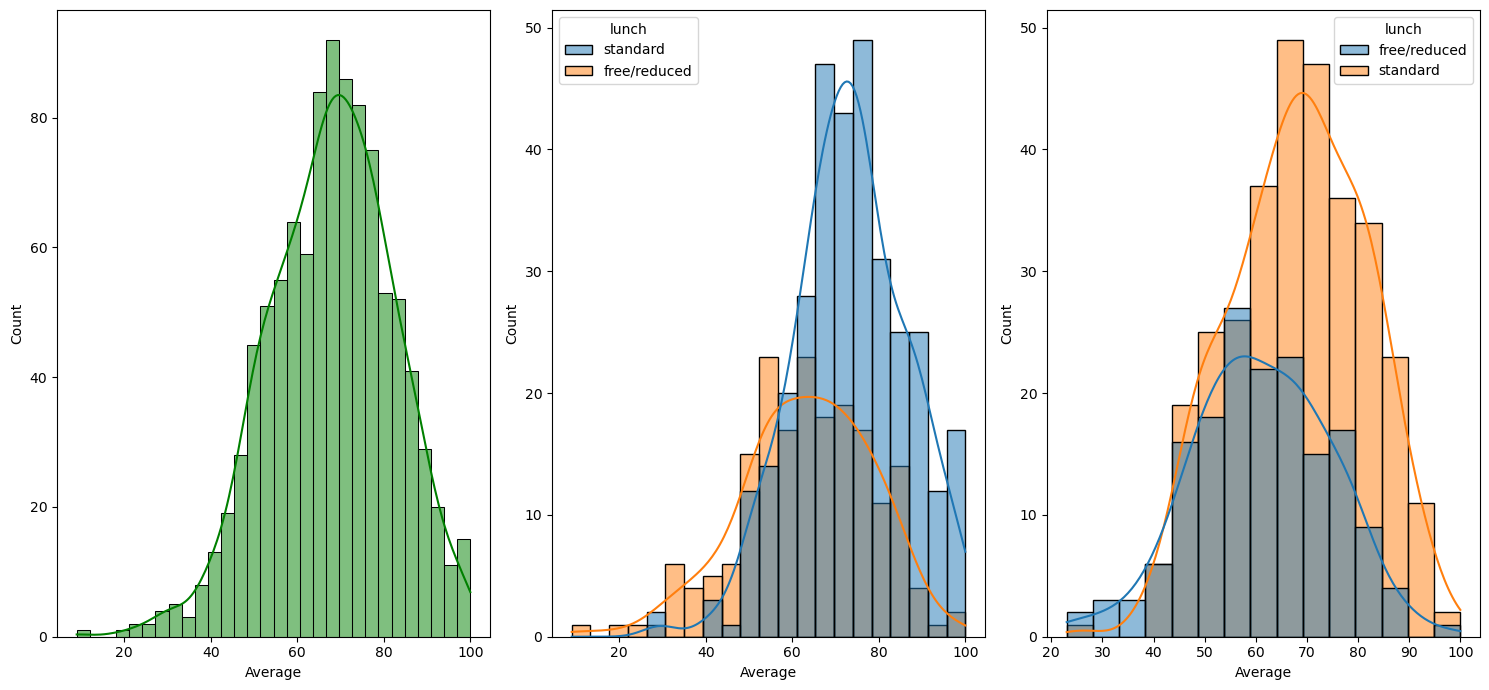

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

sns.histplot(data=df, x='Average', bins=30, kde=True, color='g', ax=axs[0])

sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch',ax=axs[1])

sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch',ax=axs[2])


plt.tight_layout()
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

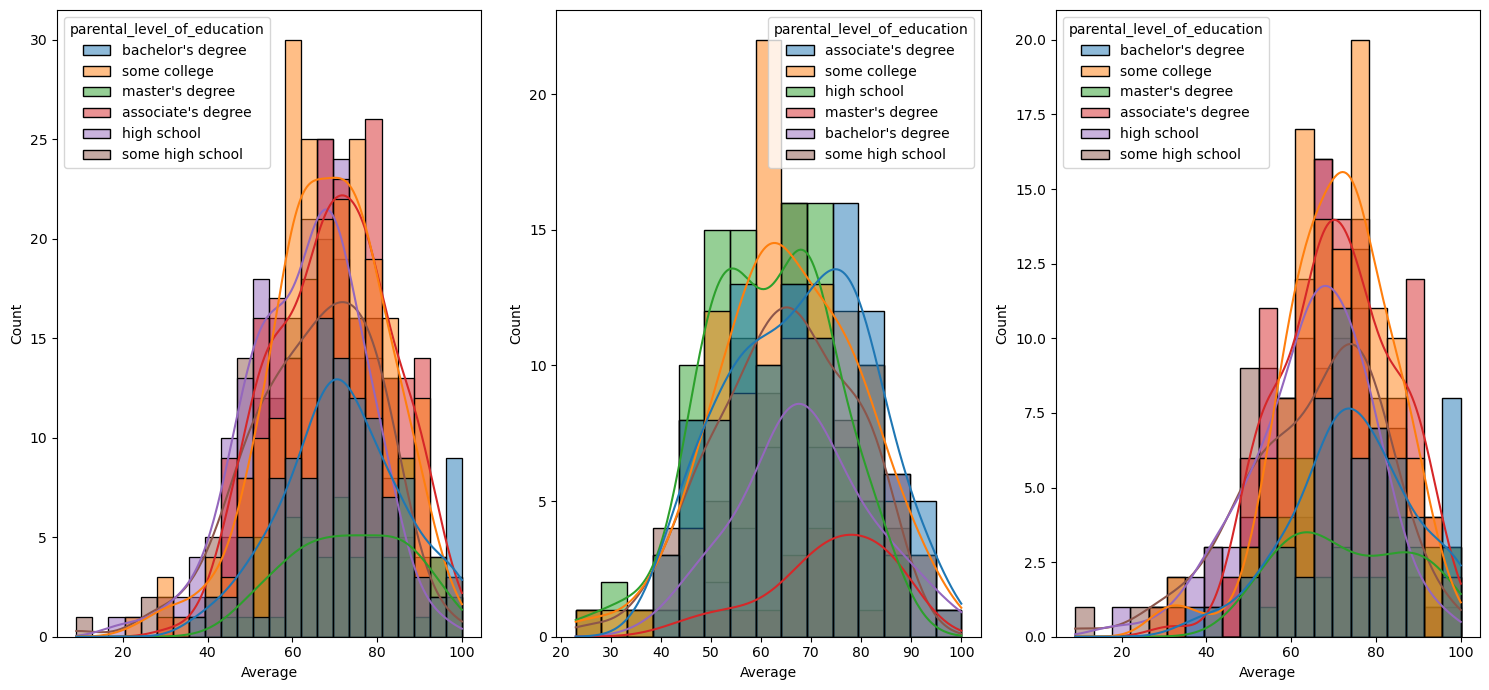

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education',ax=axs[0])

sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education',ax=axs[1])

sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education',ax=axs[2])


plt.tight_layout()
plt.show()

In [28]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'Average'],
      dtype='object')

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

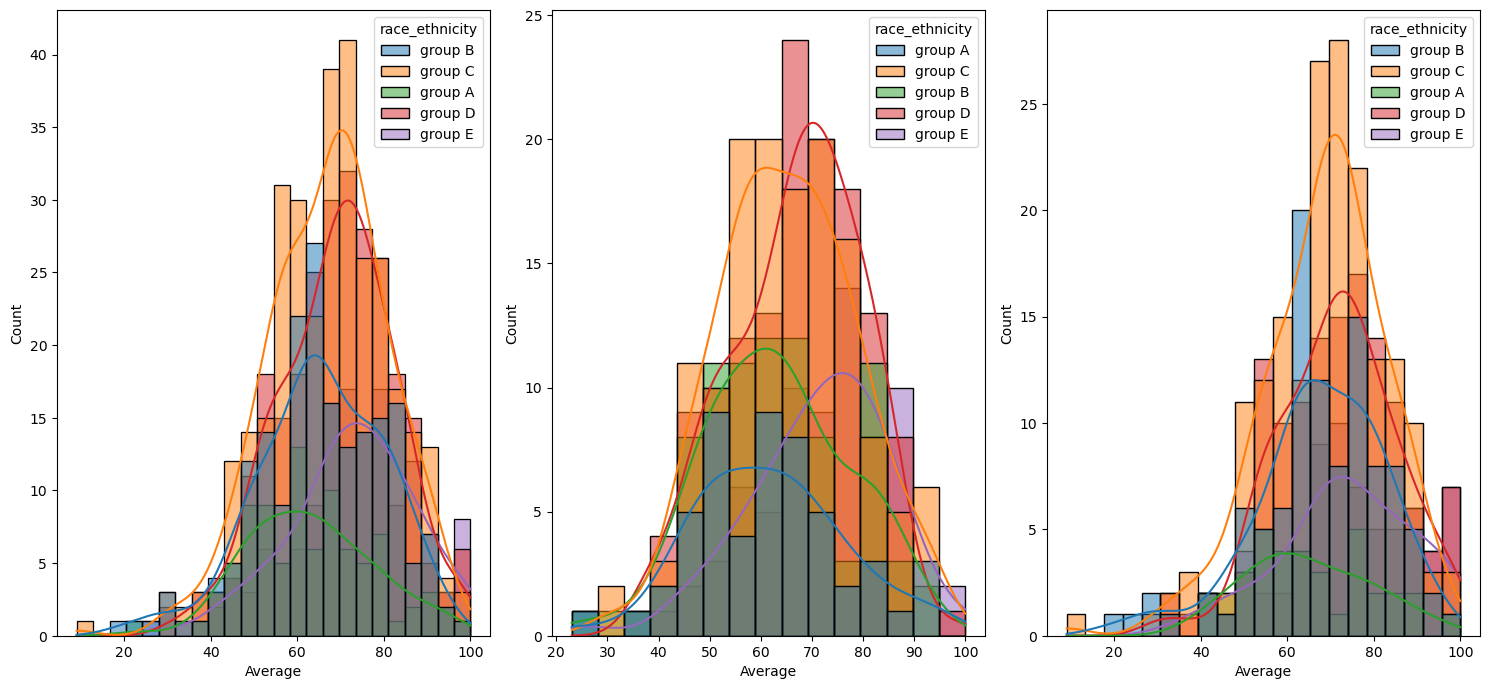

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity',ax=axs[0])

sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity',ax=axs[1])

sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity',ax=axs[2])


plt.tight_layout()
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

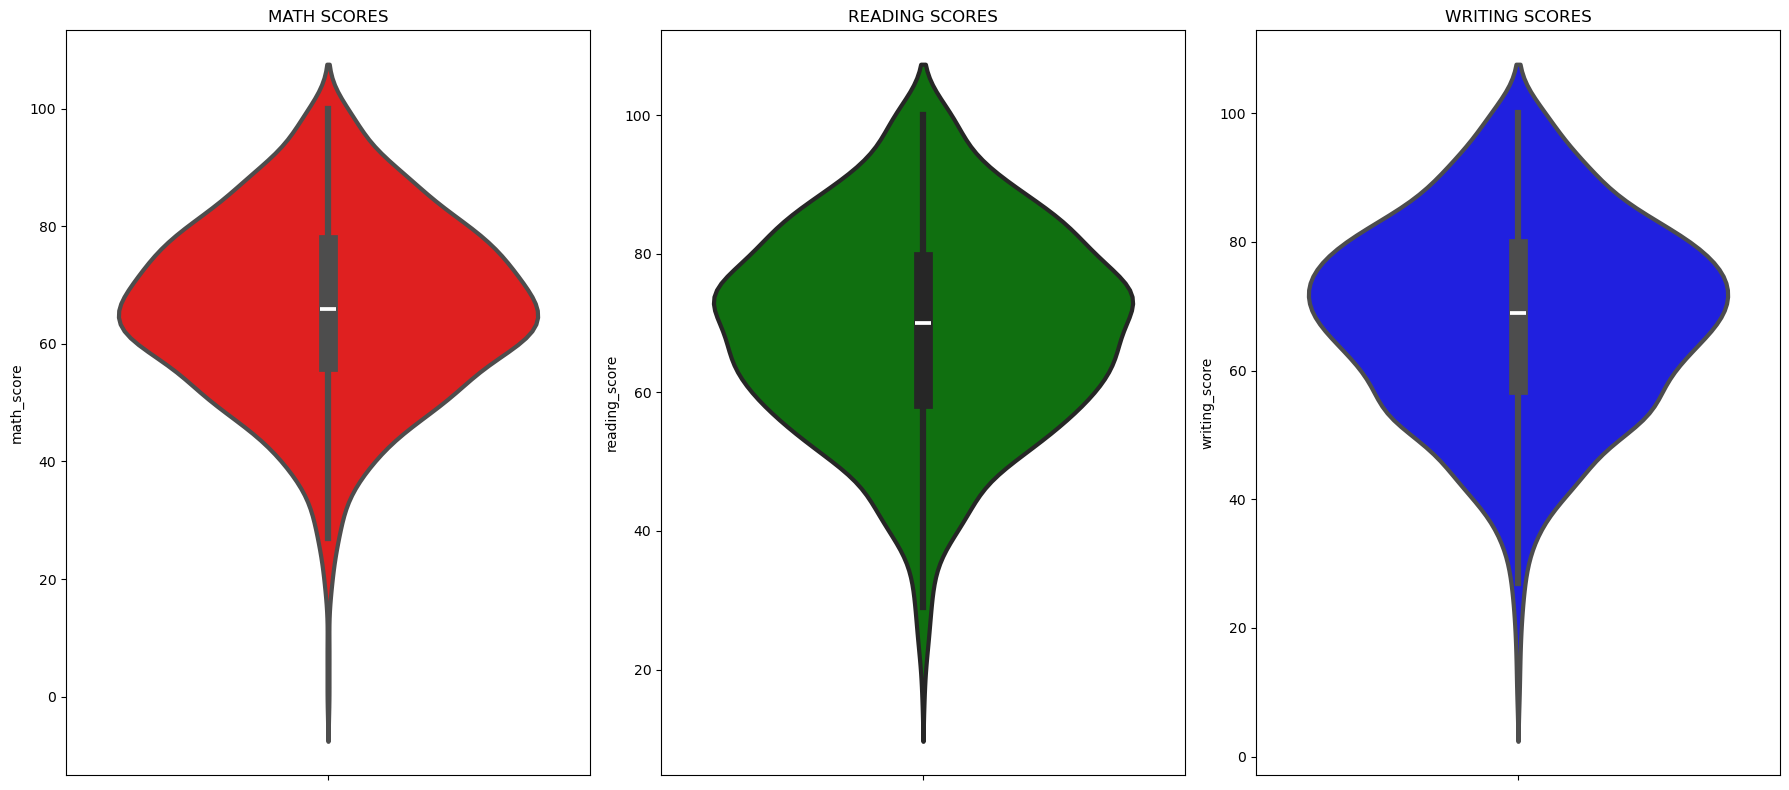

In [34]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.tight_layout()
plt.show()


#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

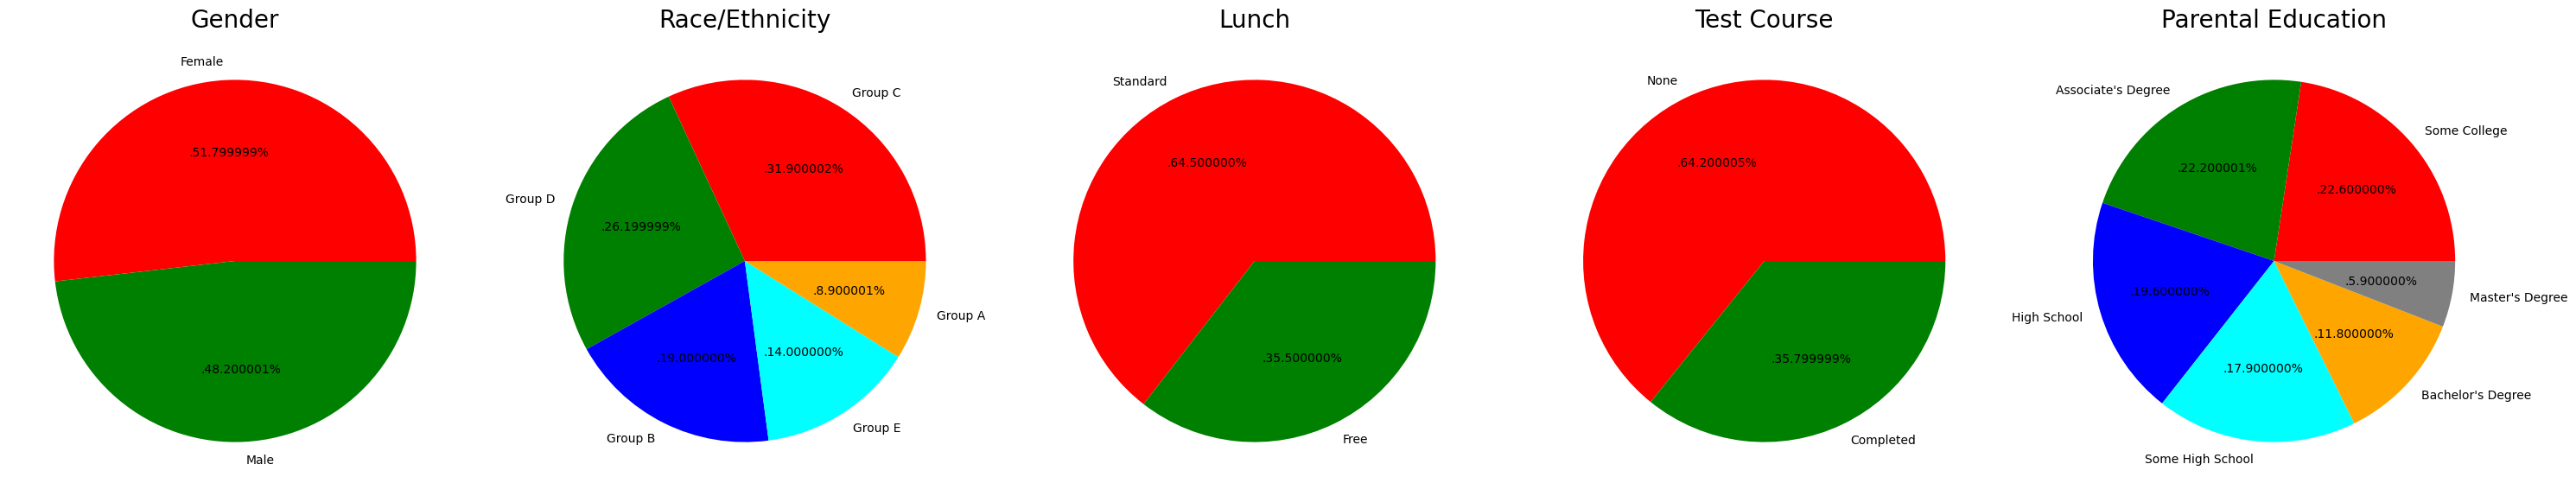

In [36]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

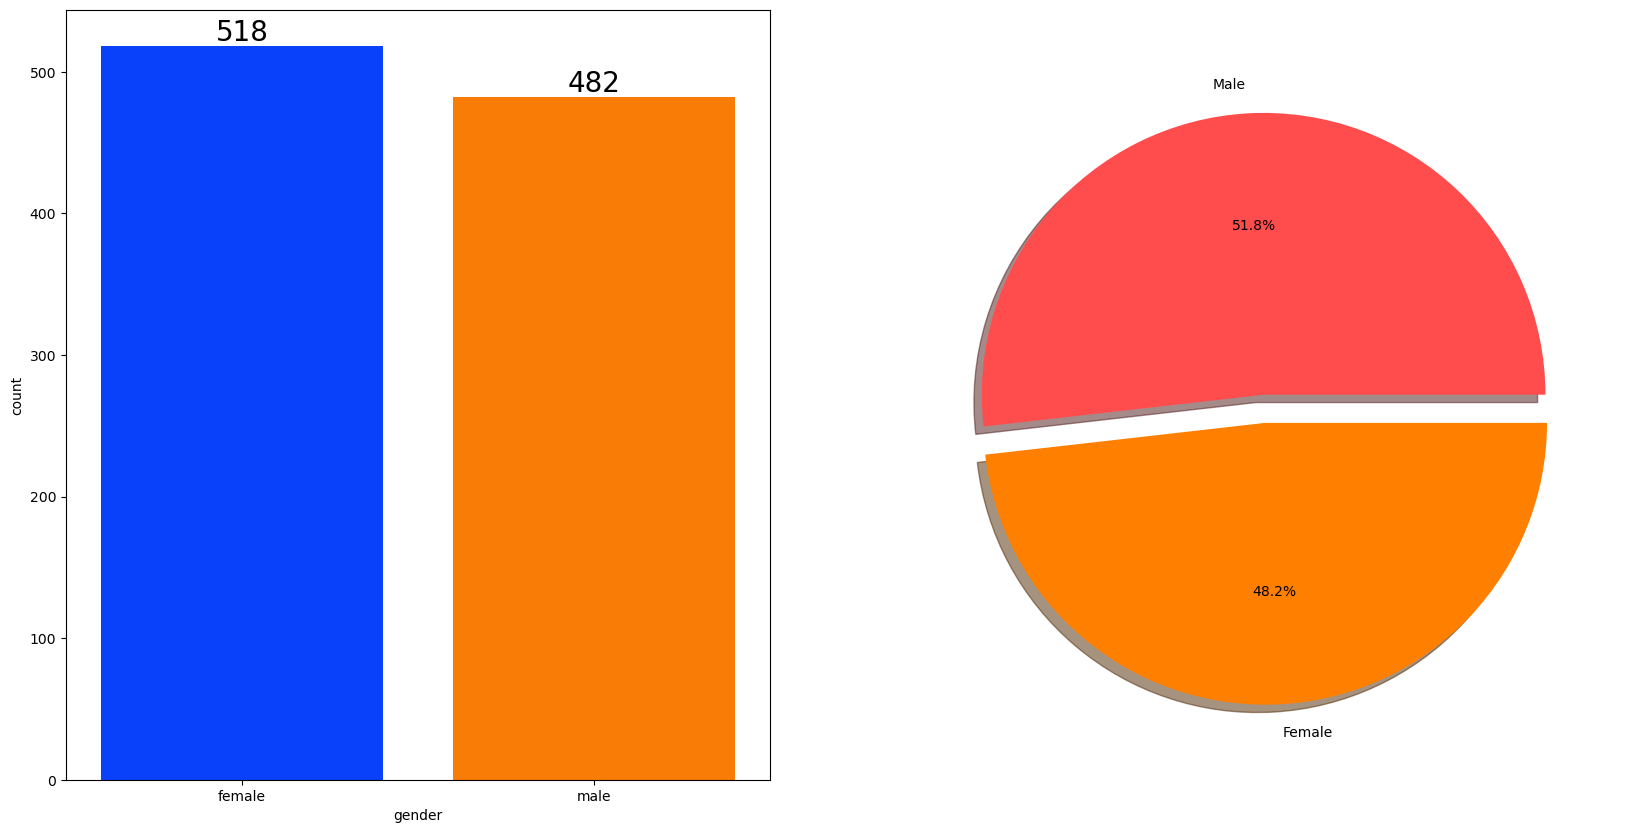

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 